In [30]:
import jieba
from collections import Counter
from os import path 
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
from wordcloud import WordCloud , STOPWORDS
import pandas as pd

import jieba.posseg as pseg

In [7]:
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False 

word_count = dict()

15개 상품 1544개의 리뷰

(4개 의상 + 11개 운동화)

In [11]:
sample = pd.read_excel('sample_reveiw(1).xlsx')
words = sample['Content']

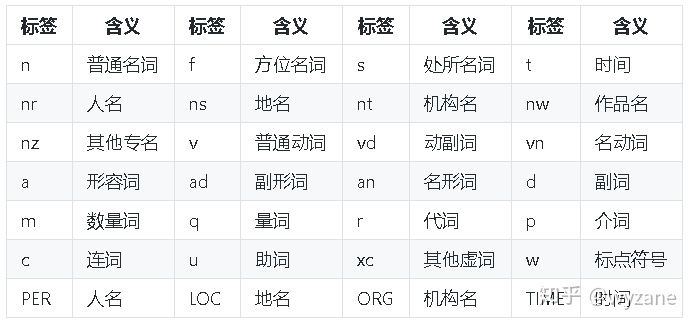

중국어 토큰화 + 품사 태깅

In [90]:
# 테스트할 문장
sentence = "尺码大小 适中 产品品性性价比 性价比很高 版型风格 休闲舒适，型"

# 품사 태깅
cl_paddle = pseg.cut(sentence, use_paddle=True)

# 품사 태깅 결과를 DataFrame으로 변환
df = pd.DataFrame(cl_paddle, columns=['단어', '품사'])

# 품사별로 그룹화하고 개수 세기
pos_counts = df.groupby('품사').size().reset_index(name='개수')

# 결과 출력
print(pos_counts)


  품사  개수
0  a   2
1  b   1
2  d   1
3  k   1
4  n   7
5  v   2
6  x   6


In [91]:
def tokenize(review):
    return jieba.lcut(review,cut_all=True)

def posseg(token):
    return pseg.cut(token,use_paddle=True)

seg_lst = words.apply(tokenize)
seg_lst_flat = [word for sublist in seg_lst for word in sublist]
cleaned_words = [word.strip('(),') for word in seg_lst_flat]

# 공백으로 연결
cut_txt = ' '.join(cleaned_words)

c_paddle = pseg.cut(cut_txt,use_paddle = True)
c_paddle_list = list(c_paddle)


In [107]:
c_paddle_list

[pair(' ', 'x'),
 pair('尺码', 'n'),
 pair(' ', 'x'),
 pair('大小', 'b'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair('适中', 'v'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair('产品', 'n'),
 pair(' ', 'x'),
 pair('品性', 'n'),
 pair(' ', 'x'),
 pair('性价比', 'n'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair('性价比', 'n'),
 pair(' ', 'x'),
 pair('很', 'zg'),
 pair(' ', 'x'),
 pair('高', 'a'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair('版型', 'n'),
 pair(' ', 'x'),
 pair('风格', 'n'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair('休闲', 'v'),
 pair(' ', 'x'),
 pair('舒适', 'a'),
 pair(' ', 'x'),
 pair('，', 'x'),
 pair(' ', 'x'),
 pair('型', 'k'),
 pair(' ', 'x'),
 pair('很', 'zg'),
 pair(' ', 'x'),
 pair('好看', 'v'),
 pair(' ', 'x'),
 pair('，', 'x'),
 pair(' ', 'x'),
 pair('上', 'f'),
 pair(' ', 'x'),
 pair('脚', 'n'),
 pair(' ', 'x'),
 pair('效果', 'n'),
 pair(' ', 'x'),
 pair('很', 'zg'),
 pair(' ', 'x'),
 pair('好', 'a'),
 pair(' ', 'x

In [89]:
for word, flag in c_paddle:
    print(f"{word}\t{flag}")


 	x
尺码	n
 	x
大小	b
 	x
 	x
适中	v
 	x
 	x
 	x
 	x
 	x
产品	n
 	x
品性	n
 	x
性价比	n
 	x
 	x
性价比	n
 	x
很	zg
 	x
高	a
 	x
 	x
 	x
 	x
 	x
版型	n
 	x
风格	n
 	x
 	x
休闲	v
 	x
舒适	a
 	x
，	x
 	x
型	k
 	x
很	zg
 	x
好看	v
 	x
，	x
 	x
上	f
 	x
脚	n
 	x
效果	n
 	x
很	zg
 	x
好	a
 	x
，	x
 	x
爱	v
 	x
了	ul
 	x
爱	v
 	x
了	ul
 	x
 	x
产品	n
 	x
品性	n
 	x
性价比	n
 	x
 	x
高	a
 	x
 	x
 	x
 	x
 	x
版型	n
 	x
风格	n
 	x
 	x
休闲	v
 	x
闲时	t
 	x
时尚	n
 	x
 	x
 	x
 	x
 	x
尺码	n
 	x
大小	b
 	x
 	x
平时	t
 	x
37	m
 	x
 	x
 	x
 	x
 	x
这	r
款	m
 	x
买	v
 	x
的	uj
 	x
38	m
 	x
刚	d
 	x
合适	a
 	x
，	x
 	x
鞋子	n
 	x
真的	d
 	x
很	zg
 	x
舒服	a
 	x
，	x
 	x
有	v
 	x
回弹	v
 	x
的	uj
 	x
感觉	n
 	x
，	x
 	x
上	f
 	x
脚	n
 	x
走路	n
 	x
真的	d
 	x
舒服	a
 	x
 	x
尺码	n
 	x
大小	b
 	x
 	x
适中	v
 	x
 	x
 	x
 	x
 	x
产品	n
 	x
品性	n
 	x
性价比	n
 	x
 	x
高	a
 	x
 	x
 	x
 	x
 	x
版型	n
 	x
风格	n
 	x
 	x
舒服	a
 	x
 	x
 	x
 	x
 	x
合脚	n
 	x
 	x
 	x
 	x
 	x
 	x
 	x
 	x
 	x
 	x
 	x
轻便	a
 	x
 	x
尺码	n
 	x
大小	b
 	x
 	x
看	v
 	x
评论	n
 	x
论说	n
 	x
偏	a
 	x
小	a
 	x
就	d
 	x
买	v
 	x
大半	m
 	x
半码	n
 	x
，	x
 	x
刚刚	d
 	x
刚好	

In [100]:
# 품사 코드와 의미를 매핑한 딕셔너리
pos_mapping = {
    'x': '未知語 (Unknown)',
    'n': '명사 (Noun)',
    'v': '동사 (Verb)',
    'a': '형용사 (Adjective)',
    'd': '부사 (Adverb)',
    'zg': '중국어 (Chinese word)',
    'b': '포함 (including)',
    'm': '수사 (Numeral)',
    'uj': '조사 (Auxiliary)',
    'vn': '명동사 (Noun for Adjective)',
    'r': '대명사 (Pronoun)',
    'c': '접속사 (Conjunction)',
    'ul': '의성어 (Auxiliary word)', 
    'p': '전치사 (Preposition)',
    'o': '의성어 (Onomatopoeia)',
    'f': '방위사 (Localizer)',
    't': '시간어 (Time word)',
    'nr': '사람 이름 (Name of person)',
    'ns': '지역 이름 (Name of place)',
    'l': '관용구 (Idiom)',
    'ad': '형용사 부사 (Adverb of adjective)',
    'y': '어조 부사 (Modal particle)',
    'nz': '기타 고유 명사 (Other proper noun)',
    'i': '성어 (Idiom)',
    'q': '양사 (Measure word)',
    'z': '상태 형용사 (State word)',
    'eng': '영어단어 (English word)',
    'ug': '개별 어형소 (Individual morpheme)', #吧，了，着와 같이 특정 단어와 결합해 문장을 형성하거나 특정 뉘앙스르 부여함
    'e': '감탄사 (Interjection)',
    'ud': '동사 형태소 (Morpheme for verb)',
    'u': '조동사 (Auxiliary verb)',
    's': '장소사 (Place word)',
    'k': '접미사 (Suffix)',
    'nrt': '인칭대명사 (Personal pronoun)',
    'ng': '명사 형태소 (Morpheme for noun)',
    'uz': '어휘 구성 요소 (Constituent of compound words)',
    'j': '약어 (Abbreviation)',
    'vd': '부동사 (Adverb for verb)',
    'df': '불가산 명사 (Uncountable noun)',
    'uv': '장소 동사 (Verb for place)',
    'mq': '수량사 (Quantifier)',
    'an': '명사 형용사 (Noun for noun)',
    'g': '어소/어근 (Morpheme)',
    'tg': '시간 어근 (Morpheme for time)',
    'uz': '고유 명사 (Proper noun)',
}

# 데이터 프레임 생성 함수
def create_pos_dataframe(pos_counts):
    pos_df = pd.DataFrame(pos_counts, columns=['품사 코드', '개수'])
    pos_df['품사 의미'] = pos_df['품사 코드'].map(pos_mapping)
    return pos_df

# 품사 개수 계산
pos_cnt = df['품사'].value_counts().reset_index()
pos_cnt.columns = ['품사 코드', '개수']

# 최종 결과 데이터 프레임 생성
pos_df = create_pos_dataframe(pos_cnt)


In [101]:
pos_df

,품사 코드,개수,품사 의미
0,x,44248,未知語 (Unknown)
1,n,8996,명사 (Noun)
2,v,4701,동사 (Verb)
3,a,3155,형용사 (Adjective)
4,d,2180,부사 (Adverb)
5,zg,1289,중국어 (Chinese word)
6,b,1058,포함 (including)
7,m,862,수사 (Numeral)
8,uj,727,조사 (Auxiliary)
9,vn,721,명동사 (Noun for Adjective)


상위 10개 키워드 df 형태로 확인하기

In [209]:
def create_pos_dataframe(c_paddle_list):
    pos_counts = {}
    for word, pos in c_paddle_list:
        if pos not in pos_counts:
            pos_counts[pos] = {'단어': []}
        pos_counts[pos]['단어'].append(word)

    pos_df = pd.DataFrame(pos_counts).T.reset_index()
    pos_df.columns = ['품사 코드', '단어']
    pos_df['품사 의미'] = pos_df['품사 코드'].map(pos_mapping)
    return pos_df[['품사 코드', '품사 의미', '단어']]

# DataFrame 생성
sample_df = create_pos_dataframe(c_paddle_list)
word_counts = sample_df.explode('단어').groupby(['품사 코드', '단어']).size().reset_index(name='등장 횟수')
top10_words = word_counts.groupby('품사 코드').apply(lambda x: x.nlargest(10, '등장 횟수')).reset_index(drop=True)
top10_keywords = top10_words.groupby('품사 코드').apply(lambda x: x['단어'].tolist()).reset_index(name='상위키워드_top10')
sample_df = pd.merge(sample_df, top10_keywords, on='품사 코드', how='left')
sample_df 

,품사 코드,품사 의미,단어,상위키워드_top10
0,x,未知語 (Unknown),"[ , , , , , , , , , , , , , , , ...","[ , ，, 。, ！, \n, ., …, 5, 【, 】]"
1,n,명사 (Noun),"[尺码, 产品, 品性, 性价比, 性价比, 版型, 风格, 脚, 效果, 产品, 品性, ...","[尺码, 性价比, 产品, 版型, 风格, 品性, 动感, 运动感, 鞋子, 脚]"
2,b,포함 (including),"[大小, 大小, 大小, 大小, 大小, 大小, 大小, 大小, 大小, 大小, 大小, 大...","[大小, 唯, 超级, 主要, 所有, 上档次, 同等, 常洗, 总, 水洗]"
3,v,동사 (Verb),"[适中, 休闲, 好看, 爱, 爱, 休闲, 买, 有, 回弹, 适中, 看, 买, 好看,...","[感受, 买, 喜欢, 好看, 休闲, 会, 是, 穿着, 满意, 品]"
4,zg,중국어 (Chinese word),"[很, 很, 很, 很, 穿, 穿, 很, 哦, 行, 很, 很, 穿, 穿, 穿, 穿, ...","[很, 穿, 行, 哦, 较, 选, 棒, 啊, 度, 丢]"
5,a,형용사 (Adjective),"[高, 舒适, 好, 高, 合适, 舒服, 舒服, 高, 舒服, 轻便, 偏, 小, 小, ...","[好, 舒服, 合适, 不错, 舒适, 高, 大, 小, 轻便, 偏]"
6,k,접미사 (Suffix),"[型, 型, 们, 者, 型, 们, 型, 型, 型, 型, 们, 型, 型, 型, 型, ...","[型, 们, 者]"
7,f,방위사 (Localizer),"[上, 上, 上, 后面, 上, 后, 上, 上, 上, 上, 上, 上, 上, 中, 上,...","[上, 之前, 中, 以前, 后, 下, 以后, 西, 底, 里]"
8,ul,의성어 (Auxiliary word),"[了, 了, 了, 了, 了, 了, 了, 了, 了, 了, 了, 了, 了, 了, 了, ...",[了]
9,t,시간어 (Time word),"[闲时, 平时, 闲时, 冬天, 平时, 春天, 下次, 夏天, 过时, 秋冬, 雨天, 闰...","[平时, 现在, 夏天, 下次, 下来, 会上, 星期, 冬天, 秋冬, 闲时]"


#워드 클라우드

데이터 프레임 새로 구성

In [230]:
# def create_pos_dataframe(c_paddle_list):
#     pos_counts = {}
#     for word, pos in c_paddle_list:
#         if pos not in pos_counts:
#             pos_counts[pos] = {'단어': []}
#         pos_counts[pos]['단어'].append(word)

#     pos_df = pd.DataFrame(pos_counts).T.reset_index()
#     pos_df.columns = ['품사 코드', '단어']
#     pos_df['품사 의미'] = pos_df['품사 코드'].map(pos_mapping)
#     return pos_df[['품사 코드', '품사 의미', '단어']]

wclod_df = pd.DataFrame(c_paddle_list,columns=['단어','품사 코드'])
wclod_df = wclod_df[wclod_df['단어']!=' ']
wclod_df = wclod_df[wclod_df['품사 코드']!='x']


# wclod_df에서 단어와 품사 코드 컬럼 추출
n_words_df = wclod_df[wclod_df['품사 코드'] == 'n']
v_words_df = wclod_df[wclod_df['품사 코드'] == 'v']
a_words_df = wclod_df[wclod_df['품사 코드'] == 'a']
# 선택된 행에서 '단어'와 '품사 코드' 컬럼 추출
nwords_list = n_words_df['단어'].tolist()
vwords_list = v_words_df['단어'].tolist()
awords_list = a_words_df['단어'].tolist()

icon_path = 'cloud.png'
icon = Image.open(icon_path)
mask = Image.new('RGB',icon.size,(255,255,255))
mask.paste(icon,icon)
mask= np.array



In [203]:
wclod_df

,단어,품사 코드
1,尺码,n
3,大小,b
6,适中,v
12,产品,n
14,品性,n
...,...,...
71540,希望,v
71542,越,d
71544,穿越,v
71546,大,a


In [194]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple([255,255,255]) # RGB code of white color

font_path = 'SNsanafonGyou.ttf'



findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not foun

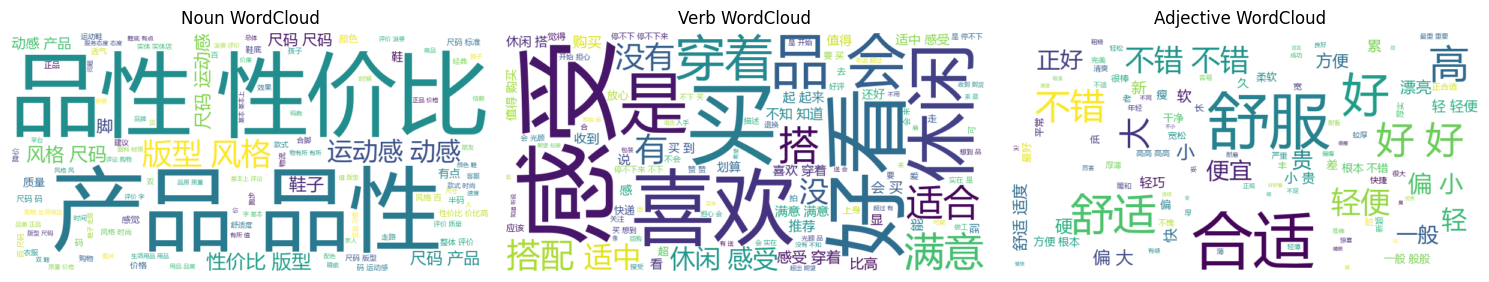

In [231]:
n_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white',font_path = 'msyh.ttc').generate(' '.join(nwords_list))
v_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white',font_path = 'msyh.ttc').generate(' '.join(vwords_list))
a_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white',font_path = 'msyh.ttc').generate(' '.join(awords_list))
# wordcloud = WordCloud(
#     width=800, 
#     height=400, 
#     max_words=100, 
#     background_color='white', # font_path를 비워두면 시스템 폰트를 사용
#     font_path = 'msyh.ttc'
# ).generate_from_frequencies(word_freq)


# 그림을 나타낼 크기를 설정
plt.figure(figsize=(15, 5))

# 첫 번째 서브플롯: '명사' 워드 클라우드
plt.subplot(1, 3, 1)
plt.imshow(n_wordcloud, interpolation='bilinear')
plt.title('Noun WordCloud')
plt.axis('off')

# 두 번째 서브플롯: '동사' 워드 클라우드
plt.subplot(1, 3, 2)
plt.imshow(v_wordcloud, interpolation='bilinear')
plt.title('Verb WordCloud')
plt.axis('off')

# 세 번째 서브플롯: '형용사' 워드 클라우드
plt.subplot(1, 3, 3)
plt.imshow(a_wordcloud, interpolation='bilinear')
plt.title('Adjective WordCloud')
plt.axis('off')

# 서브플롯 간 간격 조절
plt.tight_layout()

# 전체 플롯 보여주기
plt.show()

한국어로 번역해서 워드 클라우드 보여주기

In [219]:
import requests

def translate_chinese_to_korean(text):
    url = "https://naveropenapi.apigw.ntruss.com/nmt/v1/translation"
    headers = {
        "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
        "X-NCP-APIGW-API-KEY-ID": '80n8upg8r6',
        "X-NCP-APIGW-API-KEY": 'SO6rZZRouKVKzT7v5Ud2ooJxhK8pflVpictnwe8o',
    }
    data = {"source": "zh-CN", "target": "ko", "text": text}
    
    try:
        response = requests.post(url, headers=headers, data=data)
        response.raise_for_status()  # HTTP 에러가 발생하면 예외 발생
        translated_text = response.json()["message"]["result"]["translatedText"]
        return translated_text
    except requests.exceptions.RequestException as e:
        print(f"Translation failed: {e}")
        return None


In [208]:
chinese_text = "你好，这是一个示例。"
korean_text = translate_chinese_to_korean(chinese_text)
korean_text

'안녕하세요, 이것은 예시입니다.'

In [222]:
nwords_list = list(set(nwords_list))

In [224]:
len(nwords_list)

559

In [225]:
kor_nlst = []
for word in nwords_list:
    kor_nlst.append(translate_chinese_to_korean(word))



In [227]:
vwords_list = list(set(vwords_list))
awords_list = list(set(awords_list))

kor_vlst=[]
kor_alst=[]

for word in vwords_list:
    kor_vlst.append(translate_chinese_to_korean(word))

for word in awords_list:
    kor_alst.append(translate_chinese_to_korean(word))    

In [229]:
# 딕셔너리 완성~

n_mapping = pd.DataFrame({'한국어 명사': kor_nlst, '중국어 명사': nwords_list})
v_mapping = pd.DataFrame({'한국어 동사': kor_vlst, '중국어 동사': vwords_list})
a_mapping = pd.DataFrame({'한국어 형용사': kor_alst, '중국어 형용사': awords_list})

In [244]:
n_words_merged = pd.merge(n_words_df, n_mapping, how='left', left_on='단어', right_on='중국어 명사')
v_words_merged = pd.merge(v_words_df, v_mapping, how='left', left_on='단어', right_on='중국어 동사')
a_words_merged = pd.merge(a_words_df, a_mapping, how='left', left_on='단어', right_on='중국어 형용사')
n_words_merged['한중_병기'] = n_words_merged.apply(lambda row: f"{row['중국어 명사']} ({row['한국어 명사']})", axis=1)
v_words_merged['한중_병기'] = v_words_merged.apply(lambda row: f"{row['중국어 동사']} ({row['한국어 동사']})", axis=1)
a_words_merged['한중_병기'] = _words_merged.apply(lambda row: f"{row['중국어 형용사']} ({row['한국어 형용사']})", axis=1)

findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not foun

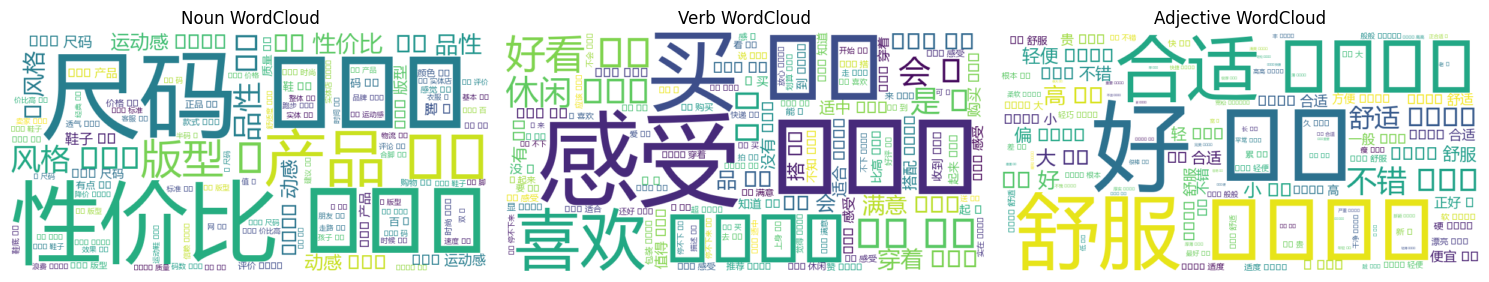

In [250]:
kor_nlist = n_words_merged['한중_병기'].tolist()
kor_vlist = v_words_merged['한중_병기'].tolist()
kor_alist = a_words_merged['한중_병기'].tolist()


nkor_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white',font_path = 'msyh.ttc').generate(' '.join(kor_nlist))
vkor_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white',font_path = 'msyh.ttc').generate(' '.join(kor_vlist))
akor_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white',font_path = 'msyh.ttc').generate(' '.join(kor_alist))
# wordcloud = WordCloud(
#     width=800, 
#     height=400, 
#     max_words=100, 
#     background_color='white', # font_path를 비워두면 시스템 폰트를 사용
#     font_path = 'msyh.ttc'
# ).generate_from_frequencies(word_freq)


# 그림을 나타낼 크기를 설정
plt.figure(figsize=(15, 5))

# 첫 번째 서브플롯: '명사' 워드 클라우드
plt.subplot(1, 3, 1)
plt.imshow(nkor_wordcloud, interpolation='bilinear')
plt.title('Noun WordCloud')
plt.axis('off')

# 두 번째 서브플롯: '동사' 워드 클라우드
plt.subplot(1, 3, 2)
plt.imshow(vkor_wordcloud, interpolation='bilinear')
plt.title('Verb WordCloud')
plt.axis('off')

# 세 번째 서브플롯: '형용사' 워드 클라우드
plt.subplot(1, 3, 3)
plt.imshow(akor_wordcloud, interpolation='bilinear')
plt.title('Adjective WordCloud')
plt.axis('off')

# 서브플롯 간 간격 조절
plt.tight_layout()

# 전체 플롯 보여주기
plt.show()